# **Social Buzz Data - Cleaning and Descriptive**
Social Buzz emphasizes content by keeping all users anonymous, only tracking user reactions on every piece of content. There are over 100 ways that users can react to content, spanning beyond the traditional reactions of likes, dislikes, and comments. This ensures that trending content, as opposed to individual users, is at the forefront of user feeds.

They are expecting an analysis of their content categories that `highlights the top 5 categories with the largest aggregate popularity`

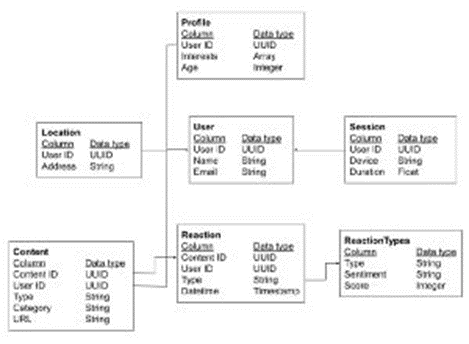

Git Path:'C:/Users/bongi/OneDrive/Bongiwe_Documents/Academics/Forage/'

In [ ]:
#SB_Location.describe(include="all")

## **1. Data**
___

In [244]:
#import libraries
import pandas as pd

In [287]:
#import data
SB_Content = pd.read_csv(r"C:\Users\bongi\OneDrive\Bongiwe_Documents\Academics\Forage\Task 1\Data\Content (1).csv")
SB_Location = pd.read_csv(r"C:\Users\bongi\OneDrive\Bongiwe_Documents\Academics\Forage\Task 1\Data\Location (1).csv")
SB_Profile = pd.read_csv(r"C:\Users\bongi\OneDrive\Bongiwe_Documents\Academics\Forage\Task 1\Data\Profile (1).csv")
SB_Reactions = pd.read_csv(r"C:\Users\bongi\OneDrive\Bongiwe_Documents\Academics\Forage\Task 1\Data\Reactions (1).csv")
SB_ReactionTypes = pd.read_csv(r"C:\Users\bongi\OneDrive\Bongiwe_Documents\Academics\Forage\Task 1\Data\ReactionTypes (1).csv")
SB_Session = pd.read_csv(r"C:\Users\bongi\OneDrive\Bongiwe_Documents\Academics\Forage\Task 1\Data\Session (1).csv")
SB_User = pd.read_csv(r"C:\Users\bongi\OneDrive\Bongiwe_Documents\Academics\Forage\Task 1\Data\User (1).csv")

## **2. Cleaning**
___

### <font color=green>Merge Datasets</font>

In [288]:
df = SB_Reactions.merge(SB_ReactionTypes,left_on='Type',right_on='Type').merge(SB_Content,left_on='Content ID', right_on='Content ID',suffixes=('_FromReaction','_FromContent'))

### <font color=green>List all Column names</font>

In [292]:
list(df.columns)

['Content ID',
 'Reaction Type',
 'Datetime',
 'Sentiment',
 'Score',
 'User ID',
 'Content Type',
 'Category',
 'URL']

### <font color=green>Drop columns</font>

In [290]:
df = df.drop(['Unnamed: 0_x','Unnamed: 0_y','Unnamed: 0','User ID_FromReaction'], axis=1)
df

,Content ID,Type_FromReaction,Datetime,Sentiment,Score,User ID_FromContent,Type_FromContent,Category,URL
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,negative,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,negative,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,negative,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,negative,10,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2020-11-09 02:49:59,negative,10,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
...,...,...,...,...,...,...,...,...,...
24568,99fcc8a6-550f-47a1-b312-aba8a031f6c7,heart,2021-02-26 15:33:26,positive,60,084eb113-0d87-4ae5-891b-2ec7f1e194a8,video,travel,https://socialbuzz.cdn.com/content/storage/99f...
24569,004e820e-49c3-4ba2-9d02-62db0065410c,heart,2021-03-09 08:50:44,positive,60,9a5aca53-6263-485a-bf77-e60c4608fd26,audio,tennis,https://socialbuzz.cdn.com/content/storage/004...
24570,a7849ef3-5930-4ba9-9cbe-e215811e713e,heart,2020-09-26 22:01:17,positive,60,d9aab962-e964-4afd-83ee-abda0865da67,photo,studying,https://socialbuzz.cdn.com/content/storage/a78...
24571,e5f1a4c6-2b27-4c8b-ac9a-21bb6ef7c946,want,2021-02-12 11:54:33,positive,70,d27670c9-f85e-43e0-80a7-122cba908f10,audio,soccer,NaN


### <font color=green>Rename columns</font>

In [291]:
df.rename(columns={'User ID_FromContent': 'User ID', 'Type_FromContent': 'Content Type', 'Type_FromReaction': 'Reaction Type'}, inplace=True)

### <font color=green>Check if Index is unique</font>

In [293]:
for a in list(df.columns):
    print(a, df[a].is_unique)

Content ID False
Reaction Type False
Datetime False
Sentiment False
Score False
User ID False
Content Type False
Category False
URL False


### <font color=green>Check for Null values</font>

In [294]:
df.isnull().sum()

Content ID          0
Reaction Type       0
Datetime            0
Sentiment           0
Score               0
User ID             0
Content Type        0
Category            0
URL              4517
dtype: int64

### <font color=green>Check for Na values</font>

In [295]:
df.isna().cumsum()

,Content ID,Reaction Type,Datetime,Sentiment,Score,User ID,Content Type,Category,URL
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
24568,0,0,0,0,0,0,0,0,4516
24569,0,0,0,0,0,0,0,0,4516
24570,0,0,0,0,0,0,0,0,4516
24571,0,0,0,0,0,0,0,0,4517


### <font color=green>Check for Duplicated rows in the entire dataframe</font>

In [296]:
df.duplicated(keep='first').sum()

0

In [297]:
df.duplicated(keep='first').value_counts()

False    24573
dtype: int64

### <font color=green>Remove Duplicated rows in the entire dataset</font>

In [298]:
df = df.drop_duplicates()

In [299]:
df.duplicated().sum()

0

### <font color=green>Check for Duplicated values per column</font>

In [300]:
for b in list(df.columns):
    print(b, df.duplicated(subset=[b], keep='first').sum())


Content ID 23611
Reaction Type 24557
Datetime 11
Sentiment 24570
Score 24558
User ID 24135
Content Type 24569
Category 24533
URL 23800


### <font color=green>Check for Unique values per row</font>

In [301]:
df.nunique(dropna=False)

Content ID         962
Reaction Type       16
Datetime         24562
Sentiment            3
Score               15
User ID            438
Content Type         4
Category            40
URL                773
dtype: int64

### <font color=green>Print unique values for certain columns</font>

In [302]:
[i for i in df['Category'].unique()]

['Studying',
 'healthy eating',
 'dogs',
 'public speaking',
 'science',
 'tennis',
 'food',
 'fitness',
 'soccer',
 'education',
 'studying',
 'travel',
 'veganism',
 'cooking',
 'technology',
 'animals',
 'culture',
 'Fitness',
 'Veganism',
 '"animals"',
 'Travel',
 '"soccer"',
 'Animals',
 'Education',
 '"dogs"',
 '"culture"',
 'Soccer',
 'Culture',
 'Food',
 '"technology"',
 '"cooking"',
 '"public speaking"',
 'Science',
 '"veganism"',
 'Public Speaking',
 '"science"',
 '"studying"',
 '"food"',
 'Healthy Eating',
 'Technology']

### <font color=green>Capitalize first letter of each word in a column</font>

In [303]:
df['Category'] = df['Category'].str.replace('"','')
df['Category'] = df['Category'].str.capitalize()
[i for i in df['Category'].unique()]

['Studying',
 'Healthy eating',
 'Dogs',
 'Public speaking',
 'Science',
 'Tennis',
 'Food',
 'Fitness',
 'Soccer',
 'Education',
 'Travel',
 'Veganism',
 'Cooking',
 'Technology',
 'Animals',
 'Culture']

### <font color=green>Get sum of scores per category</font>

In [304]:
scores = df.groupby('Category')['Score'].sum()
scores.sort_values(ascending=False)[:5]

Category
Animals           74965
Science           71168
Healthy eating    69339
Technology        68738
Food              66676
Name: Score, dtype: int64

### <font color=green>Export Dataframe</font>

In [305]:
df.to_csv(r"C:\Users\bongi\OneDrive\Bongiwe_Documents\Academics\Forage\Task 1\Data\Dataframe.csv")